<a href="https://colab.research.google.com/github/bbanzai88/Data-Science-Repository/blob/main/Pubmed_Topic_Modeling_Full_Documents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Topic Modeling

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
from datetime import datetime, timedelta
import re
import csv

In [ ]:
!mkdir '/content/sample_data/Articles'

In [ ]:
!pip install metapub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 8.9 MB/s 
     |████████████████████████████████| 41 kB 572 kB/s 
     |████████████████████████████████| 235 kB 36.2 MB/s 
     |████████████████████████████████| 86 kB 4.0 MB/s 
     |████████████████████████████████| 46 kB 3.2 MB/s 
     |████████████████████████████████| 50 kB 4.8 MB/s 
     |████████████████████████████████| 86 kB 3.8 MB/s 
     |████████████████████████████████| 8.8 MB 38.1 MB/s 
     |████████████████████████████████| 85 kB 3.5 MB/s 
     |████████████████████████████████| 85 kB 3.4 MB/s 
     |████████████████████████████████| 85 kB 3.3 MB/s 
     |████████████████████████████████| 85 kB 3.4 MB/s 
     |████████████████████████████████| 85 kB 4.2 MB/s 
     |████████████████████████████████| 85 kB 4.3 MB/s 
     |████████████████████████████████| 85 kB 3.4 MB/s 
     |████████████████████████████████| 85 kB 2.7 MB/s 


In [ ]:
!pip install textract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get install python-dev libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr \
flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig libpulse-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
python-dev is already the newest version (2.7.15~rc1-1).
libxml2-dev is already the newest version (2.9.4+dfsg1-6.1ubuntu1.7).
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libid3tag0 libijs-0.35 libjbig2dec0
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0
  libpulse-mainloop-glib0 libsox-fmt-alsa libsox-fmt-base libsox3 poppler-data
  swig3.0 tesseract-ocr-eng tesseract-ocr-osd
Suggested packages:
  fonts-noto ghostscript-x lame-doc file libsox-fmt-all fonts-japanese-mincho

In [ ]:
!apt-get install python-dev libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr \
flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig libpulse-dev --fix-missing

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
python-dev is already the newest version (2.7.15~rc1-1).
libxml2-dev is already the newest version (2.9.4+dfsg1-6.1ubuntu1.7).
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libid3tag0 libijs-0.35 libjbig2dec0
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0
  libpulse-mainloop-glib0 libsox-fmt-alsa libsox-fmt-base libsox3 poppler-data
  swig3.0 tesseract-ocr-eng tesseract-ocr-osd
Suggested packages:
  fonts-noto ghostscript-x lame-doc file libsox-fmt-all fonts-japanese-mincho

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Ign:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.13
Err:1 http://security.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.13
  404  Not Found [IP: 185.125.190.39 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/p/poppler/poppler-utils_0.62.0-2ubuntu2.13_amd64.deb  404  Not Found [IP: 185.125.190.39 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?


In [ ]:
!pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install textract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pdftotext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pdftotext-2.2.2.tar.gz (113 kB)
  ERROR: Failed building wheel for pdftotext
  Running setup.py clean for pdftotext
Failed to build pdftotext
    Running setup.py install for pdftotext ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-i4iyyvqr/pdftotext_f7d8a4fe418348659dd4bace76050a10/setup.py'"'"'; __file__='"'"'/tmp/pip-install-i4iyyvqr/pdftotext_f7d8a4fe418348659dd4bace76050a10/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-8tgh_sxd/install-record.txt --single-version-externally-managed --compile --install-he

In [ ]:
import pandas as pd
pm_subset = pd.read_csv('/content/sample_data/pm_subset.csv')
pmid_df =pd.DataFrame(pm_subset['pubmed_id'])
pmid_df=pmid_df.drop_duplicates()
pmid_df.columns =['PMID']
pmid_df2= pmid_df

In [ ]:
import os
from urllib.request import urlretrieve
import metapub
import textract

another_path = '/content/sample_data/Articles'
#another_path = './'

list_of_urls=list()
list_of_querys=list()

for ind in pmid_df.index:
  query= pmid_df['PMID'][ind]

  list_of_querys.append(query)
  
  print('query:', query)
    
  url = metapub.FindIt(query).url
  print('url:', url)

  list_of_urls.append(url)

  if url:
        
        try:
            out_file = os.path.join(another_path, str(query))
            print('out_file:', out_file)

            print('... downloading')

            urlretrieve(url, out_file + '.pdf')

    
            print('... processing')
    
            data = textract.process(out_file + '.pdf', extension='pdf', method='pdftotext', encoding="utf_8")
    
            print('... saving')
            
            with open(out_file + '.txt', "wb") as textfile:  # save bytes
                textfile.write(data)
    
            print('... OK')
            
        except Exception as ex:
            print('Exception:', ex)

query: 35566889
url: http://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC9100140&blobtype=pdf
out_file: /content/sample_data/Articles/35566889
... downloading
... processing
Exception: The command `pdftotext /content/sample_data/Articles/35566889.pdf -` failed because the executable
`pdftotext` is not installed on your system. Please make
sure the appropriate dependencies are installed before using
textract:

    http://textract.readthedocs.org/en/latest/installation.html

query: 30966571
url: http://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC6415426&blobtype=pdf
out_file: /content/sample_data/Articles/30966571
... downloading
... processing
Exception: The command `pdftotext /content/sample_data/Articles/30966571.pdf -` failed because the executable
`pdftotext` is not installed on your system. Please make
sure the appropriate dependencies are installed before using
textract:

    http://textract.readthedocs.org/en/latest/installation.html

query: 35684575
url: http://europepmc.

In [ ]:
print(list_of_urls)

['http://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC9100140&blobtype=pdf', 'http://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC6415426&blobtype=pdf', 'http://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC9182463&blobtype=pdf', None, 'http://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC8546856&blobtype=pdf', None, 'http://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC8273696&blobtype=pdf', None, 'http://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC7909251&blobtype=pdf', None, None, 'http://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC6790472&blobtype=pdf', None, None, 'http://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC6100582&blobtype=pdf', None, 'http://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC5801135&blobtype=pdf', None, None, 'http://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC6641979&blobtype=pdf', None, 'http://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC5218922&blobtype=pdf', 'http://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC7127791&

In [ ]:
print(list_of_querys)

[35566889, 30966571, 35684575, 35015975, 34729306, 34549578, 34201318, 33538053, 33498307, 33096308, 32199733, 31656670, 30848212, 30714053, 30011922, 29889511, 29411174, 29019245, 28942670, 31457757, 30428215, 28101251, 27979594, 26729496, 26594487, 25282893, 24927000, 24691705, 24383322, 24366623, 24025457, 23886345, 23847068]


In [ ]:

urls_df= pd.DataFrame(data=list_of_urls, columns=['Url'])
pd.DataFrame(data=list_of_urls, columns=['Url'])
querys_df=pd.DataFrame(data=list_of_querys, columns=['PMID'])
querys_urls=pd.concat([querys_df,urls_df ], axis=1)

In [ ]:
querys_urls.to_csv('/content/sample_data/querys_urls')

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Ign:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.13
Err:1 http://security.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.13
  404  Not Found [IP: 185.125.190.36 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/p/poppler/poppler-utils_0.62.0-2ubuntu2.13_amd64.deb  404  Not Found [IP: 185.125.190.36 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?


In [ ]:
import glob
directory = "/content/sample_data/Articles/"
files = glob.glob(f"{directory}/*")
files

['/content/sample_data/Articles/34729306.pdf',
 '/content/sample_data/Articles/33498307.pdf',
 '/content/sample_data/Articles/26594487.pdf',
 '/content/sample_data/Articles/29411174.pdf',
 '/content/sample_data/Articles/26729496.pdf',
 '/content/sample_data/Articles/31457757.pdf',
 '/content/sample_data/Articles/31656670.pdf',
 '/content/sample_data/Articles/30966571.pdf',
 '/content/sample_data/Articles/35566889.pdf',
 '/content/sample_data/Articles/27979594.pdf',
 '/content/sample_data/Articles/30011922.pdf',
 '/content/sample_data/Articles/34201318.pdf',
 '/content/sample_data/Articles/35684575.pdf',
 '/content/sample_data/Articles/24025457.pdf',
 '/content/sample_data/Articles/28101251.pdf']

In [ ]:
!pip install --upgrade gensim==3.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 2.1 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


Install Java

In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


Install Mallet

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2022-09-23 12:36:49--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-09-23 12:36:50--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  17.0MB/s    in 0.9s    

2022-09-23 12:36:51 (17.0 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.

In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
from datetime import datetime, timedelta
import re
import csv

In [ ]:
!pip install little_mallet_wrapper
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

Upload Corpus

In [ ]:
directory = "/content/sample_data/Articles"
files = glob.glob(f"{directory}/*.txt")

In [ ]:
len(files)

0

In [ ]:
training_data = []
for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)

In [ ]:
training_data2 = []
for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = text
    training_data2.append(processed_text)

In [ ]:
#with open('/content/sample_data/full_doc_text2.txt', 'w') as f:
 #  for text in training_data2:
#       f.write(text)
 #      f.write('\n')

#training_data.to_csv('/content/sample_data/full_doc_text.csv')

#training_data.to_csv("/content/sample_data/full_doc_text.csv", index = False)


import numpy as np 
 
np.savetxt("/content/sample_data/full_doc_text.csv", training_data, delimiter =",",fmt ='% s')

In [ ]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 0
Mean Number of Words per Document: nan
Vocabulary Size: 0


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import matplotlib.pyplot as plt

2022-09-23 12:38:26 33cfab7f8880 gensim.summarization.textcleaner[249] INFO 'pattern' package not found; tag filters are not available for English


In [ ]:
import nltk

nltk.download('stopwords')

# Using the stopwords.
from nltk.corpus import stopwords

# Initialize the stopwords
stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

Prepare Corpus for Topic Modeling

In [ ]:


data = training_data
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data = [re.sub('\s+', ' ', sent) for sent in data]
data = [re.sub("\'", "", sent) for sent in data]
data_words=data
print(data_words[:4]) #it will print the data after prepared for stopwords
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
def remove_stopwords(texts):
   return [[word for word in simple_preprocess(str(doc)) 
   if word not in stop_words] for doc in texts]
def make_bigrams(texts):
   return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
   [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
   texts_out = []
   for sent in texts:
      doc = nlp(" ".join(sent))
      texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
   return texts_out
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=[
   'NOUN', 'ADJ', 'VERB', 'ADV'
])
print(data_lemmatized[:4]) #it will print the lemmatized data.
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:4]) #it will print the corpus we created above.
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:4]] 
#it will print the words with their frequencies.
lda_model = gensim.models.ldamodel.LdaModel(
   corpus=corpus, id2word=id2word, num_topics=20, random_state=100, 
   update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True
)

2022-09-23 12:39:11 33cfab7f8880 gensim.models.phrases[249] INFO collecting all words and their counts
2022-09-23 12:39:11 33cfab7f8880 gensim.models.phrases[249] INFO collected 0 word types from a corpus of 0 words (unigram + bigrams) and 0 sentences
2022-09-23 12:39:11 33cfab7f8880 gensim.models.phrases[249] INFO using 0 counts as vocab in Phrases<0 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2022-09-23 12:39:11 33cfab7f8880 gensim.models.phrases[249] INFO collecting all words and their counts
2022-09-23 12:39:11 33cfab7f8880 gensim.models.phrases[249] INFO collected 0 word types from a corpus of 0 words (unigram + bigrams) and 0 sentences
2022-09-23 12:39:11 33cfab7f8880 gensim.models.phrases[249] INFO using 0 counts as vocab in Phrases<0 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2022-09-23 12:39:11 33cfab7f8880 gensim.models.phrases[249] INFO source_vocab length 0
2022-09-23 12:39:11 33cfab7f8880 gensim.models.phrases[249] INFO Phraser built with 0

[]
[]
[]


ValueError: ignored

2022-08-01 13:11:35 27408b50226a gensim.models.wrappers.ldamallet[345] INFO serializing temporary corpus to /tmp/da1ec4_corpus.txt
2022-08-01 13:11:35 27408b50226a gensim.models.wrappers.ldamallet[345] INFO converting temporary corpus to MALLET format with /content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/da1ec4_corpus.txt --output /tmp/da1ec4_corpus.mallet
2022-08-01 13:11:36 27408b50226a gensim.models.wrappers.ldamallet[345] INFO training MALLET LDA with /content/mallet-2.0.8/bin/mallet train-topics --input /tmp/da1ec4_corpus.mallet --num-topics 2  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /tmp/da1ec4_state.mallet.gz --output-doc-topics /tmp/da1ec4_doctopics.txt --output-topic-keys /tmp/da1ec4_topickeys.txt --num-iterations 1000 --inferencer-filename /tmp/da1ec4_inferencer.mallet --doc-topics-threshold 0.0  --random-seed 0
2022-08-01 13:12:09 27408b50226a gensim.models.wrappers.ldamal

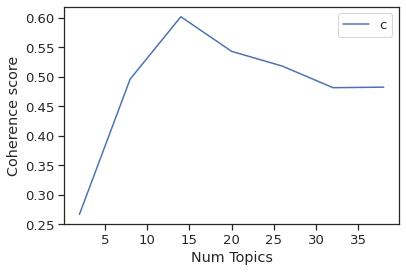

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.2666
Num Topics = 8  is having Coherence Value of 0.496
Num Topics = 14  is having Coherence Value of 0.6017
Num Topics = 20  is having Coherence Value of 0.543
Num Topics = 26  is having Coherence Value of 0.518
Num Topics = 32  is having Coherence Value of 0.4814
Num Topics = 38  is having Coherence Value of 0.4823


In [ ]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))


2022-08-01 13:16:59 27408b50226a gensim.models.wrappers.ldamallet[345] INFO topic #0 (2.500): 0.047*"wild" + 0.047*"isolate" + 0.038*"boar" + 0.028*"gene" + 0.024*"animal" + 0.022*"virulence" + 0.022*"resistance" + 0.020*"strain" + 0.018*"pathogen" + 0.018*"antimicrobial"
2022-08-01 13:16:59 27408b50226a gensim.models.wrappers.ldamallet[345] INFO topic #1 (2.500): 0.054*"complex" + 0.021*"center" + 0.021*"ligand" + 0.020*"solution" + 0.019*"phosphatase" + 0.019*"purple" + 0.018*"metal" + 0.016*"model" + 0.016*"dinuclear" + 0.014*"temperature"
2022-08-01 13:16:59 27408b50226a gensim.models.wrappers.ldamallet[345] INFO topic #2 (2.500): 0.035*"compound" + 0.017*"fumardiamide" + 0.017*"derivative" + 0.014*"drug" + 0.013*"plate" + 0.013*"dmso" + 0.012*"activity" + 0.011*"control" + 0.011*"succindiamide" + 0.011*"molecule"
2022-08-01 13:16:59 27408b50226a gensim.models.wrappers.ldamallet[345] INFO topic #3 (2.500): 0.051*"tpur" + 0.048*"polymer" + 0.035*"segment" + 0.028*"base" + 0.025*"tem

[(0,
  '0.047*"wild" + 0.047*"isolate" + 0.038*"boar" + 0.028*"gene" + '
  '0.024*"animal" + 0.022*"virulence" + 0.022*"resistance" + 0.020*"strain" + '
  '0.018*"pathogen" + 0.018*"antimicrobial"'),
 (1,
  '0.054*"complex" + 0.021*"center" + 0.021*"ligand" + 0.020*"solution" + '
  '0.019*"phosphatase" + 0.019*"purple" + 0.018*"metal" + 0.016*"model" + '
  '0.016*"dinuclear" + 0.014*"temperature"'),
 (2,
  '0.035*"compound" + 0.017*"fumardiamide" + 0.017*"derivative" + 0.014*"drug" '
  '+ 0.013*"plate" + 0.013*"dmso" + 0.012*"activity" + 0.011*"control" + '
  '0.011*"succindiamide" + 0.011*"molecule"'),
 (3,
  '0.051*"tpur" + 0.048*"polymer" + 0.035*"segment" + 0.028*"base" + '
  '0.025*"temperature" + 0.024*"soft" + 0.019*"polyurethane" + 0.015*"chain" + '
  '0.015*"group" + 0.014*"curve"'),
 (4,
  '0.044*"study" + 0.032*"report" + 0.025*"human" + 0.023*"follow" + '
  '0.022*"detect" + 0.021*"suggest" + 0.020*"find" + 0.020*"important" + '
  '0.018*"role" + 0.018*"collect"'),
 (5,
  '

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

2022-08-01 13:17:05 27408b50226a gensim.models.wrappers.ldamallet[345] INFO serializing temporary corpus to /tmp/133faa_corpus.txt
2022-08-01 13:17:05 27408b50226a gensim.models.wrappers.ldamallet[345] INFO converting temporary corpus to MALLET format with /content/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/133faa_corpus.txt --output /tmp/133faa_corpus.mallet.infer --use-pipe-from /tmp/133faa_corpus.mallet
2022-08-01 13:17:06 27408b50226a gensim.models.wrappers.ldamallet[345] INFO inferring topics with MALLET LDA '/content/mallet-2.0.8/bin/mallet infer-topics --input /tmp/133faa_corpus.mallet.infer --inferencer /tmp/133faa_inferencer.mallet --output-doc-topics /tmp/133faa_doctopics.txt.infer --num-iterations 100 --doc-topics-threshold 0.0 --random-seed 0'


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,15.0,0.6385,"acid, information, structure, atom, parameter,...",data reports issn crystal structure isopropyl ...
1,1,11.0,0.5538,"gene, nafld, genome, sequence, chromatin, comp...",acta pharmaceutica sinica chinese pharmaceutic...
2,2,17.0,0.3851,"toxin, residue, figure, peptide, block, scorpi...",toxins article colombian scorpion centruroides...
3,3,0.0,0.6374,"wild, isolate, boar, gene, animal, virulence, ...",pathogens article prevalence virulence antimic...
4,4,12.0,0.5385,"protein, patient, disease, ami, myocardial, pl...",original article discovery potential plasma pr...
5,5,18.0,0.5926,"activity, compound, dmso, benzimidazole, subst...",chem biol doi original article antifungal anth...
6,6,9.0,0.5793,"triazole, compound, sulfanyl, platelet, aggreg...",khalid chemistry central journal https //doi o...
7,7,6.0,0.6360,"cell, activity, compound, concentration, virus...",since january elsevier created covid resource ...
8,8,3.0,0.6664,"tpur, polymer, segment, base, temperature, sof...",polymers article thermal mechanical behavior n...
9,9,2.0,0.4725,"compound, fumardiamide, derivative, drug, plat...",molecules article asymmetric primaquine haloge...


In [ ]:
df_dominant_topic.to_csv('/content/sample_data/topics.csv')

In [ ]:
import pandas as pd
pm_subset = pd.read_csv('/content/sample_data/pm_subset.csv')
#pm_subset.columns
#pm_subset['keywords']
pm_subset['meshheading']

0                                                    NaN
1                                                    NaN
2      [{'Escherichia coli': 'N'}, {'HeLa Cells': 'N'...
3      [{'Escherichia coli': 'N'}, {'HeLa Cells': 'N'...
4                                                    NaN
                             ...                        
494    [{'Acanthamoeba': 'N'}, {'Animals': 'N'}, {'An...
495    [{'Anti-Bacterial Agents': 'N'}, {'Antifungal ...
496    [{'Antiviral Agents': 'N'}, {'China': 'N'}, {'...
497    [{'Aedes': 'N'}, {'Animals': 'N'}, {'Benzofura...
498    [{'Escherichia coli': 'N'}, {'HeLa Cells': 'N'...
Name: meshheading, Length: 499, dtype: object

In [ ]:
files[1]

'/content/sample_data/Articles/24025457.txt'

In [ ]:
pattern = '[\w-]+?(?=\.)'

list2 = []
for i in range(len(files)):
    a = re.search(pattern,files[i] )
    list2.append(a.group())

print(list2)

['26594487', '34729306', '34201318', '33498307', '31656670', '28101251', '29411174', '27979594', '30966571', '30011922', '24025457', '35566889', '26729496', '31457757']


In [ ]:
list3 = [int(i) for i in list2] # cast every element in the list


In [ ]:
pm_subset2 = pm_subset[pm_subset['pubmed_id'].isin(list3)]
pm_subset2 

,Query,pubmed_id,title,keywords,meshheading,journal,abstract,doi,publication_date,authors
0,3-hydroxy-2-(hydroxymethyl)-2-methylpropanoic ...,35566889,The Use of Branching Agents in the Synthesis o...,"['PBAT', 'branching agents', 'long-chain branc...",NaN,Polymers,Biodegradable polyesters represent an advanced...,10.3390/polym14091720,2022-05-14,"[{'lastname': ""Nifant'ev"", 'firstname': 'Ilya ..."
1,3-hydroxy-2-(hydroxymethyl)-2-methylpropanoic ...,30966571,Thermal and Mechanical Behavior of New Transpa...,"['carboxylate elastomers', 'dynamical mechanic...",NaN,Polymers,New transparent thermoplastic polyurethane ela...,10.3390/polym10050537,2019-04-11,"[{'lastname': 'Puszka', 'firstname': 'Andrzej'..."
7,"1,4a-dimethyl-7-propan-2-yl-2,3,4,4b,5,6,10,10...",34729306,3D disorganization and rearrangement of genome...,"['3C, chromosome conformation capture', '3D ge...",NaN,Acta pharmaceutica Sinica. B,The three-dimensional (3D) conformation of chr...,10.1016/j.apsb.2021.03.022,2021-11-03,"[{'lastname': 'Xu', 'firstname': 'Lina', 'init..."
10,"1,4a-dimethyl-7-propan-2-yl-2,3,4,4b,5,6,10,10...",34729306,3D disorganization and rearrangement of genome...,"['3C, chromosome conformation capture', '3D ge...",NaN,Acta pharmaceutica Sinica. B,The three-dimensional (3D) conformation of chr...,10.1016/j.apsb.2021.03.022,2021-11-03,"[{'lastname': 'Xu', 'firstname': 'Lina', 'init..."
14,"1,4a-dimethyl-7-propan-2-yl-2,3,4,4b,5,6,10,10...",34729306,3D disorganization and rearrangement of genome...,"['3C, chromosome conformation capture', '3D ge...",NaN,Acta pharmaceutica Sinica. B,The three-dimensional (3D) conformation of chr...,10.1016/j.apsb.2021.03.022,2021-11-03,"[{'lastname': 'Xu', 'firstname': 'Lina', 'init..."
...,...,...,...,...,...,...,...,...,...,...
486,"1,4a-dimethyl-7-propan-2-yl-2,3,4,4b,5,6,10,10...",28101251,Antifungal and anthelmintic activity of novel ...,"['Anthelmintic activity', 'Antifungal', 'Benzi...",NaN,Journal of chemical biology,"A novel series of thiazolo[3,2-a]benzimidazole...",10.1007/s12154-016-0160-x,2017-01-20,"[{'lastname': 'Kenchappa', 'firstname': 'R', '..."
487,"1,4a-dimethyl-7-propan-2-yl-2,3,4,4b,5,6,10,10...",27979594,Synthesis and in vitro antiviral evaluation of...,"['Antiviral activity', 'Bunyavirus', 'Cytotoxi...","[{'Animals': 'N'}, {'Antiviral Agents': 'N'}, ...",Bioorganic & medicinal chemistry letters,"A series of 4-substituted 3,4-dihydropyrimidin...",10.1016/j.bmcl.2016.12.010,2016-12-17,"[{'lastname': 'Kumarasamy', 'firstname': 'Dhan..."
488,"1,4a-dimethyl-7-propan-2-yl-2,3,4,4b,5,6,10,10...",26729496,Boronic Acid Transition State Inhibitors Activ...,[],"[{'Boronic Acids': 'N'}, {'Ceftazidime': 'N'},...",Antimicrobial agents and chemotherapy,Boronic acid transition state inhibitors (BATS...,10.1128/AAC.02641-15,2016-01-06,"[{'lastname': 'Rojas', 'firstname': 'Laura J',..."
489,"1,4a-dimethyl-7-propan-2-yl-2,3,4,4b,5,6,10,10...",26594487,"Crystal structure of 7-isopropyl-1,4a,N-trimet...","['C—H⋯π inter\xadactions', 'crystal structure'...",NaN,"Acta crystallographica. Section E, Crystallogr...","In the title compound, C26H37NO, a new derivat...",10.1107/S2056989015017648,2015-11-24,"[{'lastname': 'Liu', 'firstname': 'Li', 'initi..."


In [ ]:
def flatten(x):
    flat = True
    ans = []
    for i in x:
        if ( i.__class__ is list):
            ans = flatten(i)
        else:
            ans.append(i)
    return ans
#pm_subset_flat=flatten(pm_subset2['keywords']) 
pm_subset_flat=flatten(pm_subset2['meshheading'])

In [ ]:
topics = pd.read_csv('/content/sample_data/topics.csv')

In [ ]:
topics.head(2)

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,15.0,0.6385,"acid, information, structure, atom, parameter,...",data reports issn crystal structure isopropyl ...
1,1,1,11.0,0.5538,"gene, nafld, genome, sequence, chromatin, comp...",acta pharmaceutica sinica chinese pharmaceutic...


In [ ]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
!pip install matplotlib_venn_wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
topics_list1_joined = ",".join(topics['Keywords'])
len(topics_list1_joined)


1285

In [ ]:
pubmed_uniq_joined= " ".join(str(e) for e in pm_subset_flat)
len(pubmed_uniq_joined)

14781

In [ ]:
all_joined=topics_list1_joined + pubmed_uniq_joined

In [ ]:
from matplotlib_venn import venn2, venn2_circles
from matplotlib import pyplot as plt

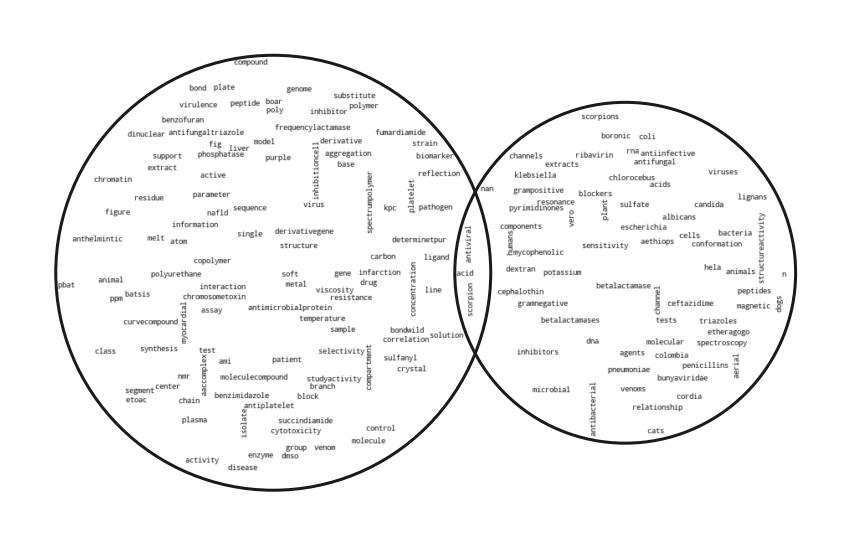

In [ ]:
from matplotlib_venn_wordcloud import venn2_wordcloud

# tokenize words (approximately at least):
sets = []
for string in [topics_list1_joined,pubmed_uniq_joined]:

    # get a word list
    words = string.split(' ')

    # remove non alphanumeric characters
    words = [''.join(ch for ch in word if ch.isalnum()) for word in words]

    # convert to all lower case
    words = [word.lower() for word in words]

    sets.append(set(words))

    plt.rcParams["figure.figsize"]=(15, 10)

# create visualisation
venn2_wordcloud(sets)

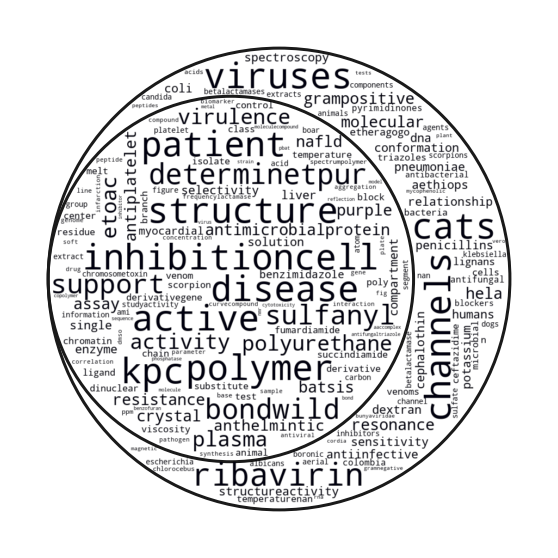

In [ ]:
#If we combine the topics and the meshterms we get more overlap
from matplotlib_venn_wordcloud import venn2_wordcloud

# tokenize words (approximately at least):
sets = []
for string in [topics_list1_joined,all_joined]:

    # get a word list
    words = string.split(' ')

    # remove non alphanumeric characters
    words = [''.join(ch for ch in word if ch.isalnum()) for word in words]

    # convert to all lower case
    words = [word.lower() for word in words]

    sets.append(set(words))

    plt.rcParams["figure.figsize"]=(15, 10)

# create visualisation
venn2_wordcloud(sets)